In [1]:
import numpy as np
import pandas as pd
import jinja2 

## Create a data frame of water temperatures in the range of -1 to 26. Negative values will be flagged in red below.

In [2]:
stations = [ "Ariel", "Beaumonde", "Bellerophon", "Haven", "Hera", "Higgins' Moon", "Jiangyin", "Lilac", "Miranda", "Osiris", "Persephone", "Regina", "Santo", "St. Albans", "Triumph", "Whitefall" ]
# r = np.random.random((100, 16))*26 - 1
n = 100
r = np.random.random((n, 16))
rw = np.cumsum(r, axis=1) - 0.1
df = pd.DataFrame(rw, columns=stations)
df.index = pd.date_range("2021-01-01", periods=n, freq="D")
df

,Ariel,Beaumonde,Bellerophon,Haven,Hera,Higgins' Moon,Jiangyin,Lilac,Miranda,Osiris,Persephone,Regina,Santo,St. Albans,Triumph,Whitefall
2021-01-01,0.324955,1.278924,1.370387,2.036551,2.307523,3.003654,3.555020,4.167079,5.122982,5.713806,6.296312,7.172774,7.245999,8.054089,8.177192,9.153091
2021-01-02,-0.006796,0.884916,1.489961,1.759951,1.793423,2.759939,3.122001,3.311603,4.152146,4.154041,4.484945,5.316395,5.902583,6.865185,7.826051,8.380474
2021-01-03,0.613110,0.796003,1.016827,2.016761,2.804187,3.647281,3.673587,3.764512,3.949635,4.880051,5.002341,5.162157,5.280501,6.200613,6.582758,7.198924
2021-01-04,0.421360,1.242727,1.644559,2.510429,3.503011,4.401229,4.774680,4.910590,5.506409,6.401373,7.137126,7.624531,7.920925,8.799111,9.404718,10.127238
2021-01-05,0.626677,0.919844,1.006009,1.359576,1.373001,1.542292,2.409633,3.020283,3.925274,3.966119,4.083201,4.170862,4.418880,4.714954,4.801362,5.512903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06,0.431584,1.226580,1.401612,1.735449,2.026141,2.694850,2.906632,3.649111,3.880439,3.885059,4.272117,4.505997,5.407354,6.285784,7.235684,7.249238
2021-04-07,-0.090259,0.779102,0.977556,1.968151,2.903724,3.058924,3.513087,3.838224,3.977308,4.596168,5.163863,5.459242,5.764908,5.774979,6.124002,6.510706
2021-04-08,0.608267,1.306737,1.627898,2.091462,2.872561,3.014577,3.093732,4.017552,5.007913,5.644170,5.649466,6.406821,6.790624,7.342159,8.261491,8.919318
2021-04-09,0.881402,1.728785,1.971174,2.840427,3.274257,3.504996,4.333158,4.862144,5.600753,5.642769,6.301628,6.441511,6.916518,6.968004,7.830750,8.266155


## Set the table styling

Highlight good, bad, and questional values, and set the display precision to two decimal places. For this example:
* red (error): x < 0.0
* green (good): 0.0 < x < 8.0
* orange (warning): x > 8.0

In [3]:
styled_table = df.style\
    .format({'index': "{:%b %d, %Y}"})\
    .highlight_between(left=-np.inf, right=0, axis=1, props='color:red; background-color:white;')\
    .highlight_between(left=0, right=8.0, axis=1, props='color:green; background-color:white;')\
    .highlight_between(left=8.0, right=np.inf, axis=1, props='color:orange; background-color:white;')\
    .set_precision(2);

/var/folders/ll/ws3kw_mj79v31gkp6r5x_4dm0000gn/T/ipykernel_11348/1898665645.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  styled_table = df.style\


## Template handling

In [4]:
env = jinja2.Environment(loader=jinja2.FileSystemLoader(searchpath=''))
template = env.get_template('template.html')
html = template.render(my_table=styled_table.render())

## Plot the data and save the figure. The template.html file will load "plot.svg" into the web page.

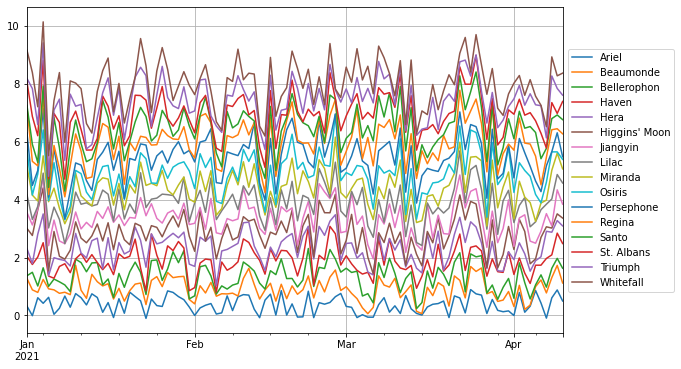

In [5]:
# Plot the data frame (not the styled table)
ax = df.plot(figsize=(12,6))
box = ax.get_position()

# Put a legend to the right of the current axis
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the grid and save the figure. Note: "plot.svg" is the filename referenced in template.html
ax.grid(True)
ax.get_figure().savefig('plot.svg')

## Write the HTML file

In [6]:
with open('report_time_series.html', 'w') as f:
    f.write(html)

## Display the styled table inline

In [7]:
styled_table

,Ariel,Beaumonde,Bellerophon,Haven,Hera,Higgins' Moon,Jiangyin,Lilac,Miranda,Osiris,Persephone,Regina,Santo,St. Albans,Triumph,Whitefall
2021-01-01 00:00:00,0.32,1.28,1.37,2.04,2.31,3.00,3.56,4.17,5.12,5.71,6.30,7.17,7.25,8.05,8.18,9.15
2021-01-02 00:00:00,-0.01,0.88,1.49,1.76,1.79,2.76,3.12,3.31,4.15,4.15,4.48,5.32,5.90,6.87,7.83,8.38
2021-01-03 00:00:00,0.61,0.80,1.02,2.02,2.80,3.65,3.67,3.76,3.95,4.88,5.00,5.16,5.28,6.20,6.58,7.20
2021-01-04 00:00:00,0.42,1.24,1.64,2.51,3.50,4.40,4.77,4.91,5.51,6.40,7.14,7.62,7.92,8.80,9.40,10.13
2021-01-05 00:00:00,0.63,0.92,1.01,1.36,1.37,1.54,2.41,3.02,3.93,3.97,4.08,4.17,4.42,4.71,4.80,5.51
2021-01-06 00:00:00,0.04,0.88,1.26,1.29,1.99,2.90,3.29,3.74,4.39,5.27,5.76,5.86,6.82,6.97,7.09,7.41
2021-01-07 00:00:00,0.25,0.77,1.16,1.69,1.94,2.04,2.57,3.31,3.70,4.08,4.67,5.08,5.79,6.66,7.46,8.38
2021-01-08 00:00:00,0.67,0.80,1.05,1.78,1.90,1.94,2.48,2.48,3.16,3.31,3.33,4.09,4.29,4.70,5.35,5.97
2021-01-09 00:00:00,0.29,0.72,0.83,1.48,1.71,2.25,2.82,3.20,3.56,3.77,4.29,5.17,5.76,6.66,7.63,8.09
2021-01-10 00:00:00,0.76,1.73,1.94,1.96,2.83,3.23,3.57,4.26,4.91,5.00,5.26,6.26,6.74,7.05,7.22,8.02


## Compute means and sparklines

In [94]:
import matplotlib.pyplot as plt
import base64
import requests
import numpy as np
import pandas as pd
from time import sleep
from itertools import chain
import io
from datetime import timedelta, date
from IPython.display import display, HTML

def sparkline(data, figsize=(4, 0.25), **kwargs):
    """
    Returns a HTML image tag containing a base64 encoded sparkline style plot
    https://www.markhneedham.com/blog/2017/09/23/python-3-create-sparklines-using-matplotlib/
    """
    data = list(data)
    
    fig, ax = plt.subplots(1, 1, figsize=figsize, **kwargs)
    ax.plot(data)
    for k,v in ax.spines.items():
        v.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])    

    plt.plot(len(data) - 1, data[len(data) - 1], 'r.')

    ax.fill_between(range(len(data)), data, len(data)*[min(data)], alpha=0.1)
    
    img = io.BytesIO()

    img = io.BytesIO()
    plt.savefig(img, transparent=True, bbox_inches='tight')
    img.seek(0)
    plt.close()

    return base64.b64encode(img.read()).decode("UTF-8")

In [106]:
data = dict(mean=[], sparkline=[])

for name in df.columns:
	data['mean'].append(df[name].mean())
	str = '<div><img src="data:image/png;base64,{}"/></div>'.format(sparkline(df[name]))
	data['sparkline'].append(str)

df_means = pd.DataFrame(data, index=df.columns)

## Write the HTML file

The following simple method yields a very outdated looking table by default:
```python
df_means.to_html(report_means2.html)
```

Fancy method:
* Create a CSS file: df_style.css
* Define an HTML string
* Write the data using the simple method, and set escape=False

In [107]:
html_string = '''
<html>
  <head><title>HTML Pandas Dataframe with CSS</title></head>
  <link rel="stylesheet" type="text/css" href="df_style.css"/>
  <body>
    {table}
  </body>
</html>
'''

# Output HTML file
with open('report_means3.html', 'w') as f:
    f.write(html_string.format(table=df_means.to_html(classes='mystyle', escape=False)))

## Display inline

In [108]:
from IPython.display import display, HTML
HTML(df_means.to_html(escape=False))

,mean,sparkline
station,,
Ariel,0.375204,
Beaumonde,0.922084,
Bellerophon,1.358401,
Haven,1.888780,
Hera,2.349402,
Higgins' Moon,2.835607,
Jiangyin,3.345720,
Lilac,3.879690,
Miranda,4.406207,
